# Theoretical

#1. Can we use Bagging for regression problems ?
- Yes, Bagging (Bootstrap Aggregating) can be used for regression problems.

 In regression, Bagging helps by reducing the variance of the model, making it more stable and accurate. For example, we can use Bagging Regressor from sklearn.ensemble, where multiple regression models (like Decision Trees) are trained on different bootstrapped samples, and their predictions are averaged to get the final output.

 This is especially useful when the base model is prone to overfitting, like decision trees. By combining many such models, Bagging gives better generalization on unseen data.

 ---

# 2. What is the difference between multiple model training and single model training ?
-  Single model training means training just one machine learning model on the dataset. This model alone is responsible for learning patterns and making predictions. For example, training one decision tree or one linear regression model.

 In contrast, multiple model training involves training several models and combining their outputs. This is often called ensemble learning. Techniques like Bagging, Boosting, and Stacking are examples of this. For instance, Random Forest trains many decision trees and averages their results.

 Single model training is simpler and faster but might not perform well if the model overfits or underfits. Multiple model training generally gives better performance because it reduces errors like overfitting or bias, but it's more complex and takes more time to train and interpret.

 In simple terms, single model training is like asking one person for an answer, while multiple model training is like asking a group of people and taking the best overall opinion.
---

#3. Explain the concept of feature randomness in Random Forest.

- Feature randomness in Random Forest means that, during the training of each decision tree, the algorithm randomly selects a subset of features (columns) to consider when making a split at each node — instead of checking all available features.

 This random selection of features helps to make the trees in the forest less similar to each other. As a result, the final model becomes more diverse and less likely to overfit.

 So, even though all trees are trained on different bootstrapped samples of the data (that’s row-level randomness), feature randomness adds an extra layer of variation by changing which features are considered for splits.

 In short, feature randomness helps Random Forest be more powerful by increasing diversity among the trees and reducing overfitting.

---

#4. What is OOB (Out-of-Bag) Score ?

- OOB (Out-of-Bag) Score is a way to evaluate the performance of a Random Forest model without using a separate validation set.

 When training each tree in a Random Forest, the algorithm uses bootstrapping — which means it selects random samples **with replacement** from the dataset. Because of this, some data points are left out of the training set for that tree. These left-out points are called **Out-of-Bag (OOB) samples**.

 The idea is simple:
 Each tree makes predictions on its own OOB samples (the data it didn’t see while training), and the model aggregates those predictions. Then we compare these predictions to the actual values to calculate an accuracy score (for classification) or an error score (for regression).

 So, the **OOB score gives us an internal estimate of model performance**, like cross-validation, but without needing a separate dataset.

 It’s efficient and useful for quick evaluation, especially when we want to avoid splitting the data.

----

#5. How can you measure the importance of features in a Random Forest model ?

- We can measure the importance of features in a Random Forest model by checking how much each feature contributes to improving the model’s accuracy during training.

There are mainly two common ways to do this:

1. **Gini Importance (also called Mean Decrease in Impurity):**
   Each time a feature is used to split a node, it helps reduce impurity (like Gini impurity or variance). Random Forest keeps track of how much impurity is reduced by each feature across all trees. The higher the total reduction, the more important the feature is.

2. **Permutation Importance:**
   After training, we randomly shuffle the values of one feature at a time and measure how much the model's performance drops. If shuffling a feature causes a big drop in accuracy, that feature is considered important. This method is more accurate but slower.

In libraries like `scikit-learn`, we can easily access feature importances using:

```python
model.feature_importances_
```

This gives us a list of scores showing how important each feature is in the trained Random Forest.


---

#6. Explain the working principle of a Bagging Classifier.

- The Bagging Classifier works on the idea of combining multiple models to improve accuracy and reduce overfitting.

Here’s how it works step by step:

1. **Bootstrapping the Data:**
   It creates multiple random samples (with replacement) from the original training dataset. These are called bootstrapped datasets. Each sample can have repeated rows and may leave out some original rows.

2. **Training Multiple Models:**
   A base model (like a decision tree) is trained on each bootstrapped dataset. Each model learns slightly different patterns because the data is different.

3. **Making Predictions:**

   * For classification, each model gives a class prediction, and the final output is decided by **majority voting**.
   * For regression, it would take the **average** of all predictions.

4. **Result:**
   Because the models are trained on different samples, their errors are less likely to be the same. Combining them helps cancel out individual errors and gives a more stable and accurate prediction.

So, the Bagging Classifier reduces variance and makes the final model more robust, especially when using unstable models like decision trees.

---

#7. How do you evaluate a Bagging Classifier’s performance ?

- To evaluate a **Bagging Classifier’s performance**, we use the same methods we use for any classification model, focusing on how well it predicts unseen data.

Here are the main ways:

1. **Accuracy Score:**
   It tells us the percentage of correctly predicted labels. We calculate it on a test set using:

   ```python
   from sklearn.metrics import accuracy_score
   accuracy_score(y_test, y_pred)
   ```

2. **Confusion Matrix:**
   It shows how many predictions were correct and where the model made mistakes — like false positives and false negatives.

   ```python
   from sklearn.metrics import confusion_matrix
   confusion_matrix(y_test, y_pred)
   ```

3. **Precision, Recall, and F1-Score:**
   These are helpful especially when classes are imbalanced.

   * **Precision:** How many predicted positives are actually positive
   * **Recall:** How many actual positives were correctly predicted
   * **F1-Score:** A balance between precision and recall

   ```python
   from sklearn.metrics import classification_report
   print(classification_report(y_test, y_pred))
   ```

4. **ROC-AUC Score (for binary classification):**
   It measures how well the model separates the two classes. A higher AUC means better performance.

   ```python
   from sklearn.metrics import roc_auc_score
   roc_auc_score(y_test, y_prob)
   ```

5. **OOB (Out-of-Bag) Score (specific to Bagging):**
   If `oob_score=True` when creating the BaggingClassifier, it automatically uses the samples not included in each bootstrapped dataset to estimate accuracy.

   ```python
   model.oob_score_
   ```

Using these metrics together gives a complete view of the Bagging Classifier’s performance.

---

#8. How does a Bagging Regressor work ?

- A Bagging Regressor works by combining multiple regression models to improve prediction accuracy and reduce overfitting.

 Here’s the step-by-step process:

1. **Bootstrapping the Data:**
   It creates several random samples (with replacement) from the original training dataset. Each sample might have repeated data points and exclude some others.

2. **Training Multiple Models:**
   A base regression model (like a decision tree regressor) is trained separately on each bootstrapped dataset. Because the data varies slightly for each model, they learn different patterns.

3. **Making Predictions:**
   When predicting for new data, each model gives its own output, and the Bagging Regressor **averages** all these predictions to get the final result.

4. **Why it Works:**
   By averaging predictions from many models trained on different data samples, Bagging reduces the variance of the model. This means it’s less likely to overfit and performs better on unseen data.

 In short, Bagging Regressor uses multiple models trained on different subsets of data and combines their outputs to create a more stable and accurate regression prediction.

---

#9. What is the main advantage of ensemble techniques ?

- The main advantage of ensemble techniques is that they **combine multiple
 models to produce better overall performance than any single model alone**.

 By aggregating the predictions of several models, ensembles can:

* **Reduce errors caused by overfitting or bias** in individual models.
* **Improve accuracy and robustness** by capturing different patterns in the data.
* **Increase stability** since the final prediction is less sensitive to noise or fluctuations in the training data.

 In simple terms, ensembles act like a team where different models “vote” or contribute their strengths, leading to stronger and more reliable predictions.


----

#10. What is the main challenge of ensemble methods ?

- The main challenge of ensemble methods is that they tend to be **more complex and computationally expensive** than using a single model.

Because ensembles combine multiple models, they:

* **Require more training time and resources** since you have to train many models instead of just one.
* **Can be harder to interpret and explain**, making it difficult to understand how the final prediction is made.
* **Need careful tuning and design** to make sure the models are diverse enough and combined effectively.

So, while ensembles often improve accuracy, managing their complexity and resource demands can be a big challenge.


---

#11. Explain the key idea behind ensemble techniques.

- The key idea behind ensemble techniques is to **combine multiple individual models to create a stronger overall model** that performs better than any single one.

Each individual model may have its own strengths and weaknesses or make different errors. By aggregating their predictions—through voting, averaging, or stacking—ensemble methods reduce mistakes caused by overfitting, bias, or noise.

This way, ensembles leverage the diversity among models to improve accuracy, robustness, and generalization on new data. It’s like getting a consensus from many experts rather than relying on just one opinion.

----

#12. What is a Random Forest Classifier ?

- A Random Forest Classifier is an ensemble learning method used for classification tasks. It builds many decision trees during training, each on a different random subset of the data (using bootstrapping) and also considers a random subset of features when splitting nodes.

Each tree makes a prediction, and the Random Forest combines these predictions by majority voting to decide the final class. This randomness and combination make the model more accurate and less likely to overfit compared to a single decision tree.

In short, it’s a collection of decision trees working together to give a more reliable and powerful classification result.

---

#13. What are the main types of ensemble techniques ?

- The main types of ensemble techniques are:

1. **Bagging (Bootstrap Aggregating):**
   It trains multiple models independently on different random samples (with replacement) of the training data and combines their predictions by voting (classification) or averaging (regression). Random Forest is a popular example of bagging.

2. **Boosting:**
   Models are trained sequentially, where each new model tries to correct the errors of the previous ones. The final prediction is a weighted combination of all models. Examples include AdaBoost, Gradient Boosting, and XGBoost.

3. **Stacking (Stacked Generalization):**
   Multiple different models (called base learners) are trained on the same data, and their outputs are used as input features to a higher-level model (meta-learner) that makes the final prediction.

Each type has its own way of combining models to improve overall performance.

---

#14. Sure! Here are the answers to your questions divided by ----:

---

# **14. What is ensemble learning in machine learning?**
- Ensemble learning is a technique where multiple models (often called weak learners) are combined to create a stronger, more accurate model. Instead of relying on a single model, ensembles aggregate the predictions of many models to reduce errors and improve generalization.

---

# **15. When should we avoid using ensemble methods?**
- We should avoid ensemble methods when:

* The dataset is very small, as ensembles can overcomplicate and overfit.
* We need a model that is highly interpretable, since ensembles are usually complex and harder to explain.
* Computational resources or time are limited, because ensembles require more training and prediction time.
* The base model already performs very well and simplicity is preferred.

---

# **16. How does Bagging help in reducing overfitting?**
- Bagging reduces overfitting by training multiple models on different bootstrapped samples of the data. Because each model sees a slightly different dataset, their errors tend to be uncorrelated. Combining their predictions (by voting or averaging) cancels out individual errors, lowering the overall variance and reducing overfitting.

---

# **17. Why is Random Forest better than a single Decision Tree?**
- Random Forest is better because it builds many decision trees using different subsets of data and features, which reduces variance and overfitting common in single decision trees. By aggregating predictions from many diverse trees, Random Forest achieves higher accuracy and more stable results.

---

# **18. What is the role of bootstrap sampling in Bagging?**
- Bootstrap sampling creates multiple random samples from the original dataset by sampling with replacement. Each sample is used to train a separate model. This introduces diversity among models, which is essential for Bagging to reduce variance and improve prediction stability.

---

#**19. What are some real-world applications of ensemble techniques?**
- Ensemble techniques are widely used in:

* Fraud detection in finance
* Medical diagnosis and disease prediction
* Customer churn prediction
* Image and speech recognition
* Recommendation systems
* Spam email detection
* Stock market forecasting

---

**20. What is the difference between Bagging and Boosting?**

- Bagging trains multiple models independently on random bootstrapped samples and combines their predictions by voting or averaging. It mainly reduces variance. Boosting trains models sequentially, where each model focuses on correcting errors made by previous models, combining them in a weighted manner. Boosting reduces both bias and variance but is more prone to overfitting if not tuned properly.

---


# Practical

In [2]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base model - Decision Tree
base_model = DecisionTreeClassifier()

# Initialize Bagging Classifier with Decision Trees (use estimator instead of base_estimator)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")



Bagging Classifier Accuracy: 1.0000


In [4]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base model - Decision Tree Regressor
base_model = DecisionTreeRegressor()

# Initialize Bagging Regressor with Decision Trees
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=50, random_state=42)

# Train the Bagging Regressor
bagging_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = bagging_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")



Bagging Regressor Mean Squared Error: 0.2579


In [5]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importance scores
importances = rf_model.feature_importances_

# Print feature names with their importance scores
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [6]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize single Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")


Decision Tree MSE: 0.5280
Random Forest MSE: 0.2565


In [7]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (optional, OOB uses training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest with OOB enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Print Out-of-Bag score
print(f"OOB Score: {rf_model.oob_score_:.4f}")


OOB Score: 0.9548


In [8]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base estimator - SVM classifier
svm_base = SVC(probability=True, kernel='rbf', random_state=42)

# Initialize Bagging Classifier with SVM as base estimator
bagging_model = BaggingClassifier(estimator=svm_base, n_estimators=20, random_state=42)

# Train the Bagging Classifier
bagging_model.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy:.4f}")


Bagging Classifier with SVM Accuracy: 1.0000


In [9]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of trees to try
n_trees_list = [1, 5, 10, 50, 100, 200]

for n_trees in n_trees_list:
    # Initialize Random Forest with n_trees
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)

    # Train model
    rf_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Random Forest with {n_trees} trees - Accuracy: {accuracy:.4f}")


Random Forest with 1 trees - Accuracy: 0.9474
Random Forest with 5 trees - Accuracy: 0.9649
Random Forest with 10 trees - Accuracy: 0.9649
Random Forest with 50 trees - Accuracy: 0.9708
Random Forest with 100 trees - Accuracy: 0.9708
Random Forest with 200 trees - Accuracy: 0.9708


In [12]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X, y are your data features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base logistic regression with higher max_iter
base_lr = LogisticRegression(max_iter=1000)

# Bagging classifier using logistic regression
bagging = BaggingClassifier(estimator=base_lr, n_estimators=10, random_state=42)
bagging.fit(X_train_scaled, y_train)

# Predict probabilities for AUC calculation
y_probs = bagging.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc:.4f}")



AUC Score: 0.9974


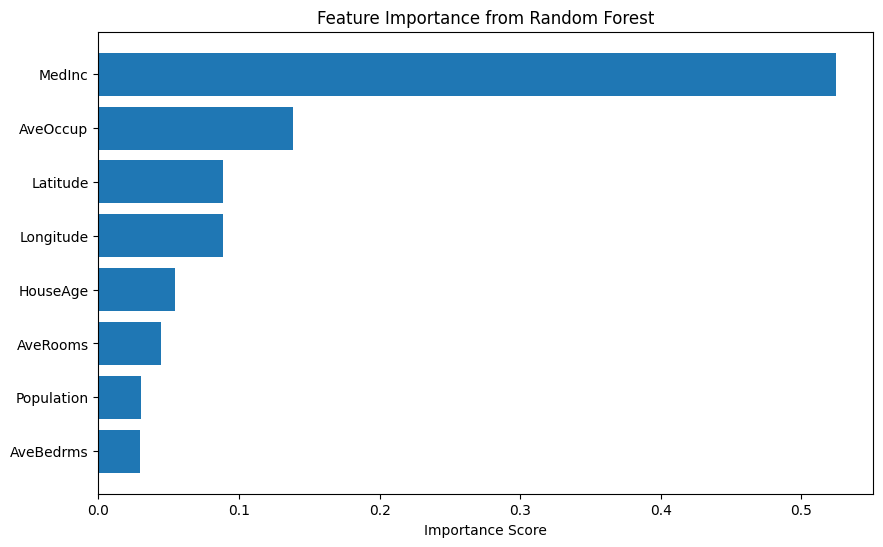

In [14]:
#29. Train a Random Forest Regressor and analyze feature importance scores

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [16]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor with Decision Tree base estimator (updated keyword)
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
r2_bag = r2_score(y_test, y_pred_bag)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Bagging Regressor R² Score: {r2_bag:.4f}")
print(f"Random Forest Regressor R² Score: {r2_rf:.4f}")



Bagging Regressor R² Score: 0.8047
Random Forest Regressor R² Score: 0.8051


In [17]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)

# Predict on test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Accuracy score
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 1.0


n_estimators=5, Test MSE=0.3060
n_estimators=10, Test MSE=0.2824
n_estimators=20, Test MSE=0.2643
n_estimators=50, Test MSE=0.2573
n_estimators=100, Test MSE=0.2559


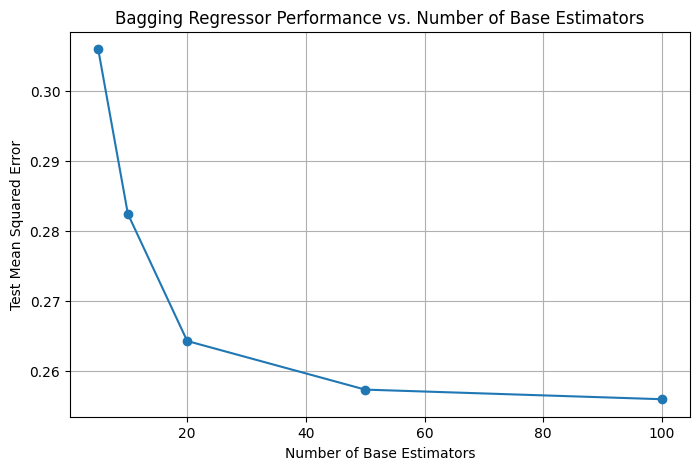

In [19]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of base estimators to try
n_estimators_list = [5, 10, 20, 50, 100]

mse_scores = []

for n in n_estimators_list:
    # Initialize Bagging Regressor with DecisionTreeRegressor as base estimator
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f'n_estimators={n}, Test MSE={mse:.4f}')

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, mse_scores, marker='o')
plt.title('Bagging Regressor Performance vs. Number of Base Estimators')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Test Mean Squared Error')
plt.grid(True)
plt.show()


In [20]:
#33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f'Total test samples: {len(y_test)}')
print(f'Number of misclassified samples: {len(misclassified_idx)}')

# Create DataFrame for misclassified samples for easier analysis
misclassified_df = pd.DataFrame(X_test[misclassified_idx], columns=feature_names)
misclassified_df['True Label'] = [target_names[i] for i in y_test[misclassified_idx]]
misclassified_df['Predicted Label'] = [target_names[i] for i in y_pred[misclassified_idx]]

print("\nMisclassified samples:")
print(misclassified_df)


Total test samples: 30
Number of misclassified samples: 0

Misclassified samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


In [22]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Train Bagging Classifier using 'estimator' instead of 'base_estimator'
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Bagging Classifier Accuracy: {acc_bagging:.4f}")



Decision Tree Accuracy: 1.0000
Bagging Classifier Accuracy: 1.0000


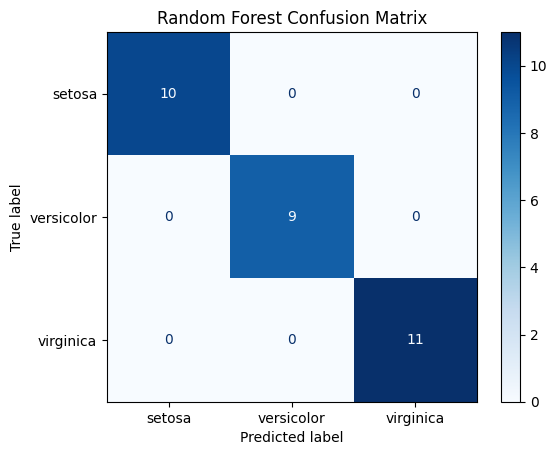

In [23]:
#35. Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [24]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Stacking Classifier with Logistic Regression as final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

# Individual models for comparison
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

# Accuracy scores
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Stacking Classifier Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0
Logistic Regression Accuracy: 1.0


In [25]:
#37. Train a Random Forest Classifier and print the top 5 most important features.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 5 features
print(feature_importance_df.head(5))


             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


In [26]:
#38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier with Decision Trees as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

# Train
bagging.fit(X_train, y_train)

# Predict
y_pred = bagging.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



max_depth=1 => Accuracy: 1.0000
max_depth=2 => Accuracy: 1.0000
max_depth=3 => Accuracy: 1.0000
max_depth=4 => Accuracy: 1.0000
max_depth=5 => Accuracy: 1.0000
max_depth=6 => Accuracy: 1.0000
max_depth=None => Accuracy: 1.0000


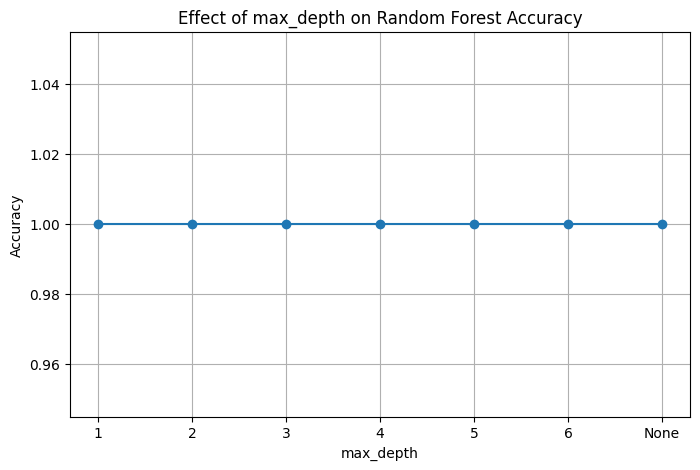

In [27]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different max_depth values to try
max_depth_values = [1, 2, 3, 4, 5, 6, None]

accuracies = []

for depth in max_depth_values:
    # Initialize RandomForest with given max_depth
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth={depth} => Accuracy: {acc:.4f}")

# Plot accuracy vs max_depth
plt.figure(figsize=(8,5))
plt.plot([str(d) for d in max_depth_values], accuracies, marker='o')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [29]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors": KNeighborsRegressor()
}

# Train and evaluate Bagging Regressor with different base estimators
for name, estimator in base_estimators.items():
    bagging = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} as base estimator -> MSE: {mse:.4f}")


Decision Tree as base estimator -> MSE: 0.2573
K-Neighbors as base estimator -> MSE: 1.0763


ROC-AUC Score: 0.9953


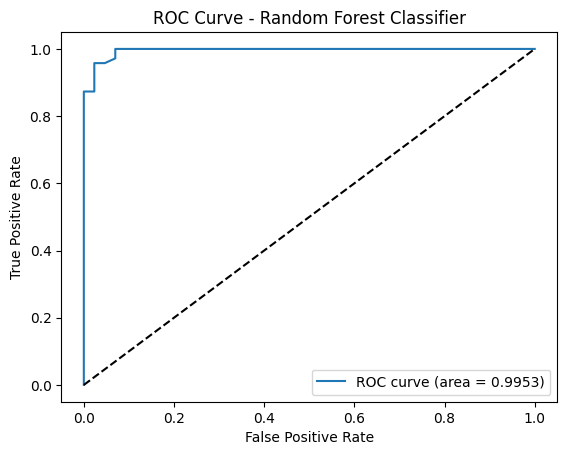

In [30]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load a binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


In [31]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize Bagging Classifier with Decision Tree as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Perform 5-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(bagging, X, y, cv=5, scoring='accuracy')

# Print mean and std deviation of accuracy across folds
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Cross-validated Accuracy: 0.9579 ± 0.0382


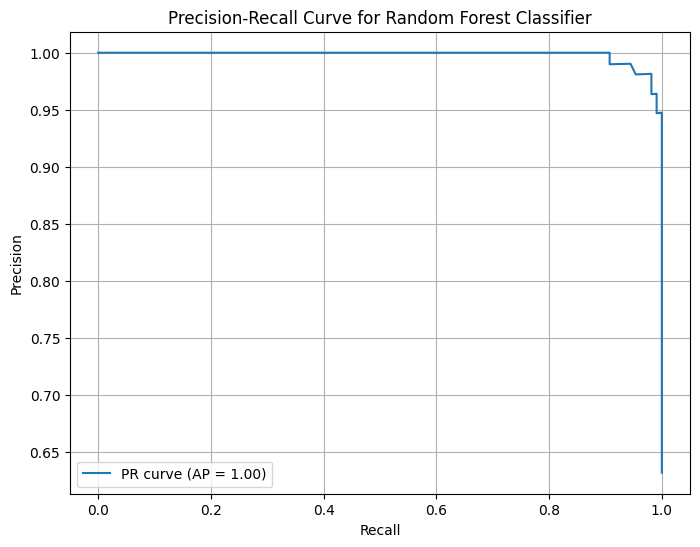

In [32]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curv.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for positive class
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score (area under curve)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create scaled logistic regression pipeline
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state=42))

# Random Forest (no scaling needed)
rf = RandomForestClassifier(random_state=42)

# Stacking Classifier uses the base estimators
stacking = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5
)

# Train base models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Train stacking model
stacking.fit(X_train, y_train)

# Predict and evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test)))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking.predict(X_test)))


Random Forest Accuracy: 0.9707602339181286
Logistic Regression Accuracy: 0.9824561403508771
Stacking Classifier Accuracy: 0.9766081871345029


Bootstrap sample fraction: 0.1 => R² Score: 0.7651
Bootstrap sample fraction: 0.3 => R² Score: 0.7892
Bootstrap sample fraction: 0.5 => R² Score: 0.7999
Bootstrap sample fraction: 0.7 => R² Score: 0.8031
Bootstrap sample fraction: 1.0 => R² Score: 0.8043


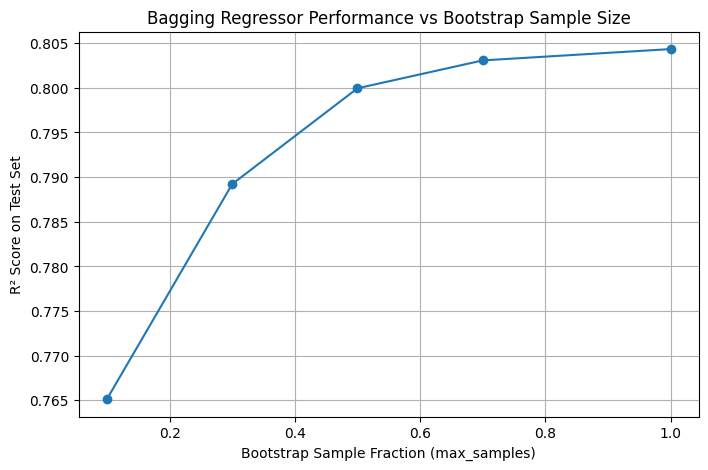

In [36]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different bootstrap sample sizes (fractions of training set)
bootstrap_samples = [0.1, 0.3, 0.5, 0.7, 1.0]

r2_scores = []

for sample_frac in bootstrap_samples:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=sample_frac,  # fraction of samples to draw from X_train
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)
    print(f"Bootstrap sample fraction: {sample_frac} => R² Score: {score:.4f}")

# Plot results
plt.figure(figsize=(8,5))
plt.plot(bootstrap_samples, r2_scores, marker='o')
plt.title('Bagging Regressor Performance vs Bootstrap Sample Size')
plt.xlabel('Bootstrap Sample Fraction (max_samples)')
plt.ylabel('R² Score on Test Set')
plt.grid(True)
plt.show()


#**----------------------------------------------END------------------------------------------**